In [23]:
import numpy as np
import csv

## Extract voice samples from original dataset

In [2]:
dataset = np.load('dataset_hf_radio.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_hf_radio.npy'

In [ ]:
dataset.shape

In [ ]:
with open("dataset_panoradio_hf_tags.csv", 'r') as x:
    sample_data = list(csv.reader(x, delimiter=","))
 
labels = np.array(sample_data)

In [ ]:
voice_samples_idxs = labels[(labels[:,1]=='lsb'),0].astype(int)

In [ ]:
dataset = dataset[voice_samples_idxs]

## Demodulation

In [84]:
with open("dataset_panoradio_hf_tags.csv", 'r') as x:
    sample_data = list(csv.reader(x, delimiter=","))
 
labels = np.array(sample_data)

mode = labels[(labels[:,1]=='lsb') | (labels[:,1]=='usb'),1]

In [85]:
dataset = np.load('dataset_ssb.npy')

In [86]:
np.nonzero(mode == 'lsb')

(array([ 9600,  9601,  9602, ..., 19197, 19198, 19199]),)

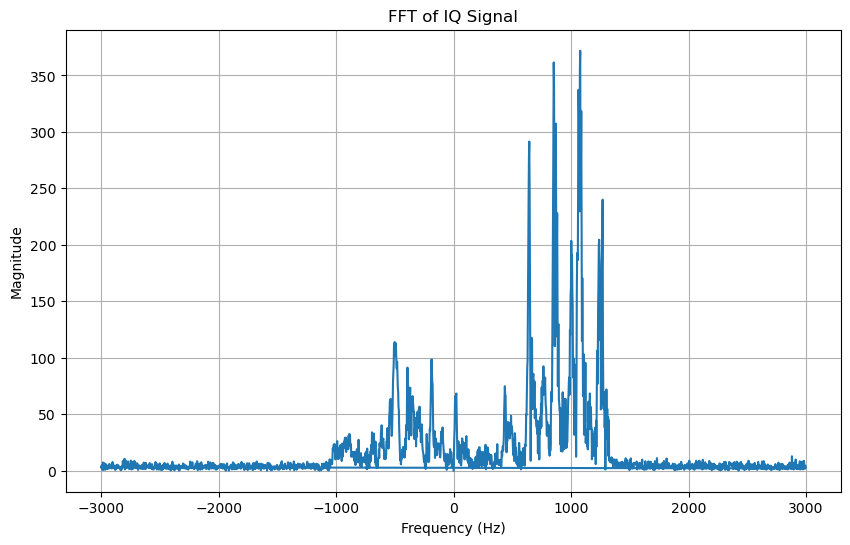

In [88]:
# Perform FFT
sampling_rate = 6000  # Hz
num_samples = 2048
fft_result = np.fft.fft(dataset[9601])
freq_axis = np.fft.fftfreq(num_samples, d=1/sampling_rate)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(freq_axis, np.abs(fft_result))
plt.title("FFT of IQ Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

In [79]:
labels

array([['idx', ' mode', ' snr'],
       ['0', 'morse', ' 25'],
       ['1', 'morse', ' 25'],
       ...,
       ['172797', 'fax', ' -10'],
       ['172798', 'fax', ' -10'],
       ['172799', 'fax', ' -10']], dtype='<U13')